In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import spapros as sp
import scanpy as sc

### ProbesetEvaluator.plot_confusion_matrix

SPAPROS PROBESET EVALUATION:                                                                 
Shared metric computations................................ ━━━━━━━━━━━━━━━━━━━━  100% 0:00:00
Probeset specific pre computations........................ ━━━━━━━━━━━━━━━━━━━━  100% 0:00:00
Final probeset specific computations...................... ━━━━━━━━━━━━━━━━━━━━    0% 0:00:00
  Computing final compuations for forest_clfs............. ━━━━━━━━━━━━━━━━━━━━  0/25 0:00:00

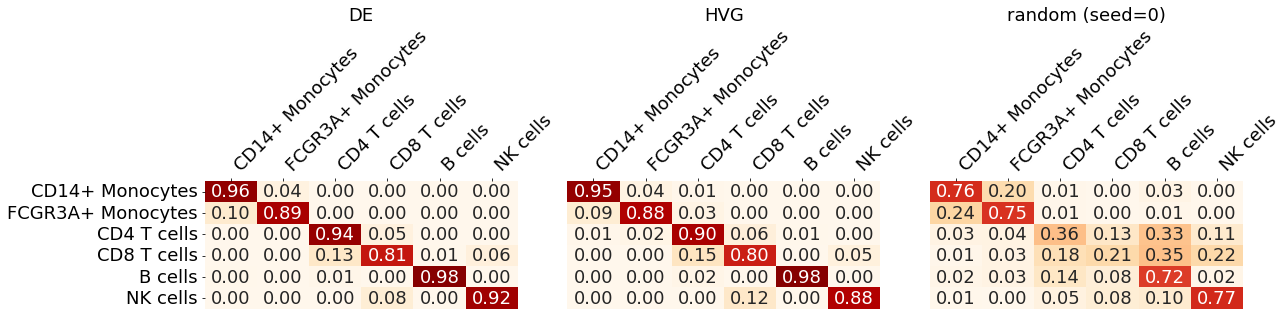

In [3]:
adata = sp.ut.get_processed_pbmc_data()
selections = sp.se.select_reference_probesets(adata,methods=["DE","HVG","random"],n=30,verbosity=0)
evaluator = sp.ev.ProbesetEvaluator(adata, verbosity=0, results_dir=None, scheme="custom", metrics=["forest_clfs"])
for set_id, df in selections.items():
    gene_set = df[df["selection"]].index.to_list()
    evaluator.evaluate_probeset(gene_set, set_id=set_id)
    
evaluator.plot_confusion_matrix(save="./Evaluator_plot_confusion_matrix.png")

### ProbesetEvaluator.plot_coexpression

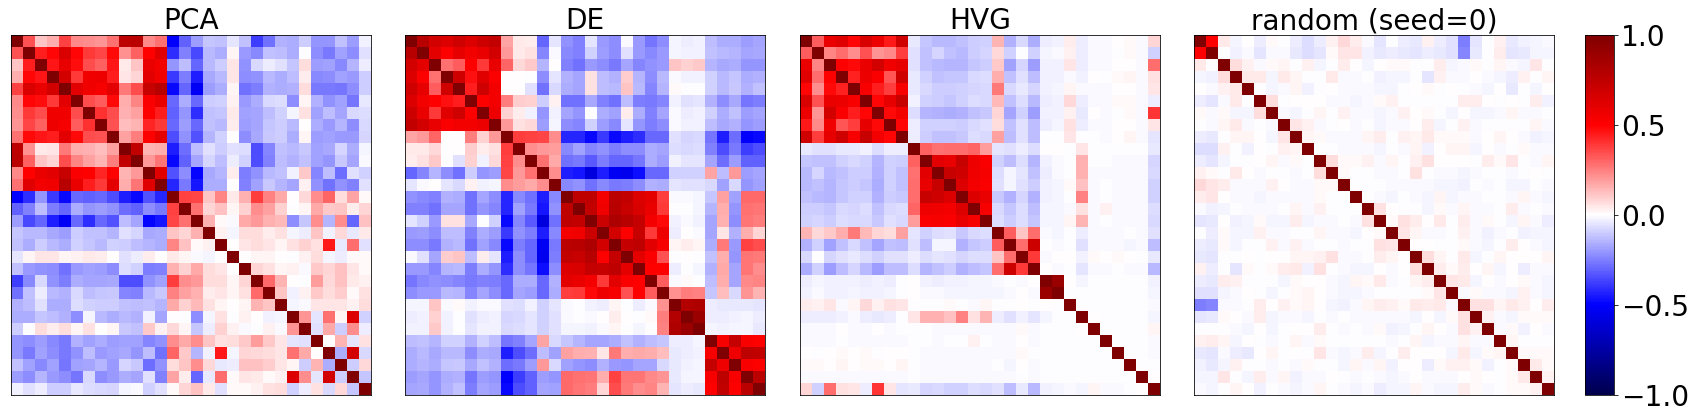

In [3]:
adata = sp.ut.get_processed_pbmc_data()
selections = sp.se.select_reference_probesets(adata, methods=["PCA","DE", "HVG", "random"], n=30, verbosity=0)
evaluator = sp.ev.ProbesetEvaluator(adata, verbosity=0, results_dir=None, scheme="custom", metrics=["gene_corr"])
for set_id, df in selections.items():
    gene_set = df[df["selection"]].index.to_list()
    evaluator.evaluate_probeset(gene_set, set_id=set_id)
    
evaluator.plot_coexpression(n_cols=4,save="./Evaluator_plot_coexpression.png")

### ProbesetSelector.plot_coexpression

Output()

Note: The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 Dendritic cells : 9
	 Megakaryocytes  : 3
The genes selected for those cell types potentially don't generalize well. Find the genes for each of those cell types in self.genes_of_primary_trees after running self.select_probeset().


No genes were selected for selection marker.
No genes were selected for selection pre.
No genes were selected for selection prior.


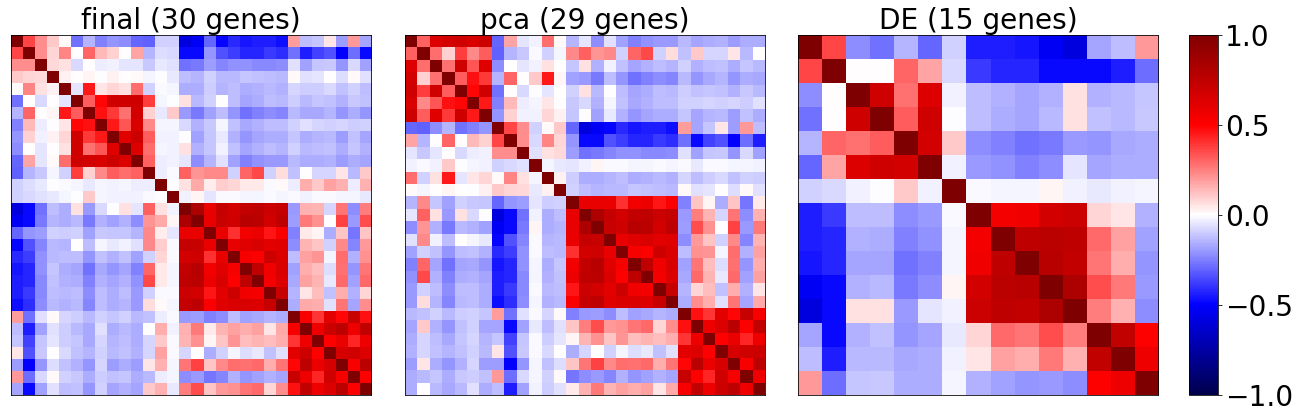

In [5]:
adata = sp.ut.get_processed_pbmc_data()
selector = sp.se.ProbesetSelector(adata, "celltype", n=30, verbosity=0)
selector.select_probeset()
selector.plot_coexpression(save="./Selector_plot_coexpression.png")


### ProbesetEvaluator.knn_overlap

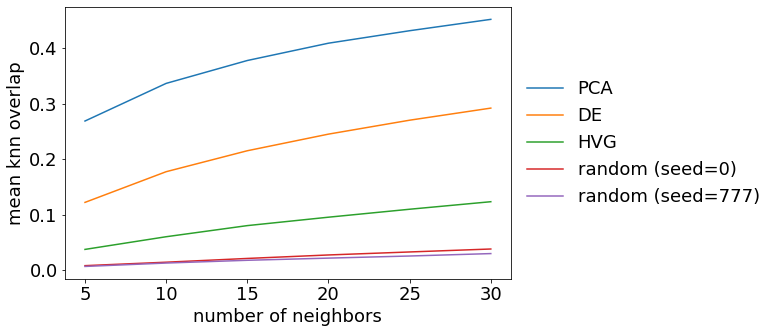

In [6]:
adata = sp.ut.get_processed_pbmc_data()
selections = sp.se.select_reference_probesets(
    adata, methods=["PCA", "DE", "HVG", "random"], n=30, seeds=[0, 777], verbosity=0)
evaluator = sp.ev.ProbesetEvaluator(
    adata, verbosity=0, results_dir=None, scheme="custom", metrics=["knn_overlap"])
for set_id, df in selections.items():
    gene_set = df[df["selection"]].index.to_list()
    evaluator.evaluate_probeset(gene_set, set_id=set_id)

evaluator.plot_knn_overlap(save="./Evaluator_plot_knn_overlap.png")

### ProbesetEvaluator.cluster_similarity

In [8]:
adata = sp.ut.get_processed_pbmc_data()
selections = sp.se.select_reference_probesets(
    adata, methods=["PCA", "DE", "HVG", "random"], n=30, seeds=[0, 777], verbosity=0)
evaluator = sp.ev.ProbesetEvaluator(
    adata, verbosity=0, results_dir=None, scheme="custom", metrics=["cluster_similarity"])
for set_id, df in selections.items():
    gene_set = df[df["selection"]].index.to_list()
    evaluator.evaluate_probeset(gene_set, set_id=set_id)

evaluator.plot_cluster_similarity(save="./Evaluator_plot_cluster_similarity.png")

KeyboardInterrupt: 

### ProbesetEvaluator.plot_summary

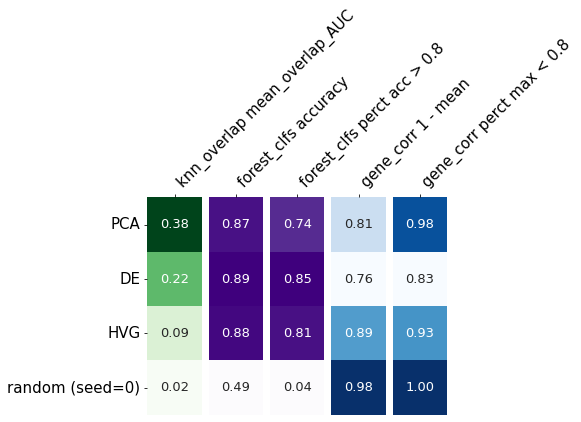

In [9]:
adata = sp.ut.get_processed_pbmc_data()
selections = sp.se.select_reference_probesets(
    adata, methods=["PCA", "DE", "HVG", "random"], n=30, verbosity=0)
evaluator = sp.ev.ProbesetEvaluator(adata, verbosity=0, results_dir=None)
for set_id, df in selections.items():
    gene_set = df[df["selection"]].index.to_list()
    evaluator.evaluate_probeset(gene_set, set_id=set_id)
evaluator.plot_summary(set_ids=["PCA", "DE", "HVG", "random (seed=0)"],save="./Evaluator_plot_summary.png")

### ProbesetSelector.gene_overlap

Output()

Note: The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 Dendritic cells : 9
	 Megakaryocytes  : 3
The genes selected for those cell types potentially don't generalize well. Find the genes for each of those cell types in self.genes_of_primary_trees after running self.select_probeset().


/Users/louis.kuemmerle/Promotion/projects/G1_genes_and_autoencoders/code/spapros/spapros/plotting/plot.py:1101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


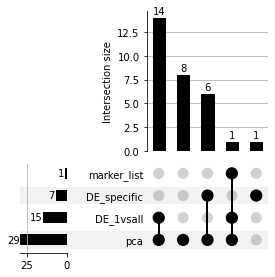

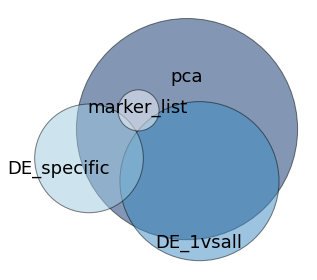

In [14]:
adata = sp.ut.get_processed_pbmc_data()
selector = sp.se.ProbesetSelector(adata, "celltype", n=30, verbosity=0, marker_list={"celltypeX": ["PF4"]})
selector.select_probeset()
selector.plot_gene_overlap(save="./Selector_plot_gene_overlap.png")
#selector.plot_gene_overlap(style="venn",save="./Selector_plot_gene_overlap_venn.png")


### ProbesetSelector.plot_clf_genes

In [38]:
adata = sp.ut.get_processed_pbmc_data()
selector = sp.se.ProbesetSelector(adata, "celltype", n=30, verbosity=0)
selector.select_probeset()
selector.plot_clf_genes(n_cols=4,celltypes=["FCGR3A+ Monocytes","Megakaryocytes"],save="./Selector_plot_clf_genes.png")

Output()

Note: The following celltypes' test set sizes for forest training are below min_test_n (=20):
	 Dendritic cells : 9
	 Megakaryocytes  : 3
The genes selected for those cell types potentially don't generalize well. Find the genes for each of those cell types in self.genes_of_primary_trees after running self.select_probeset().


TypeError: 'NoneType' object is not subscriptable

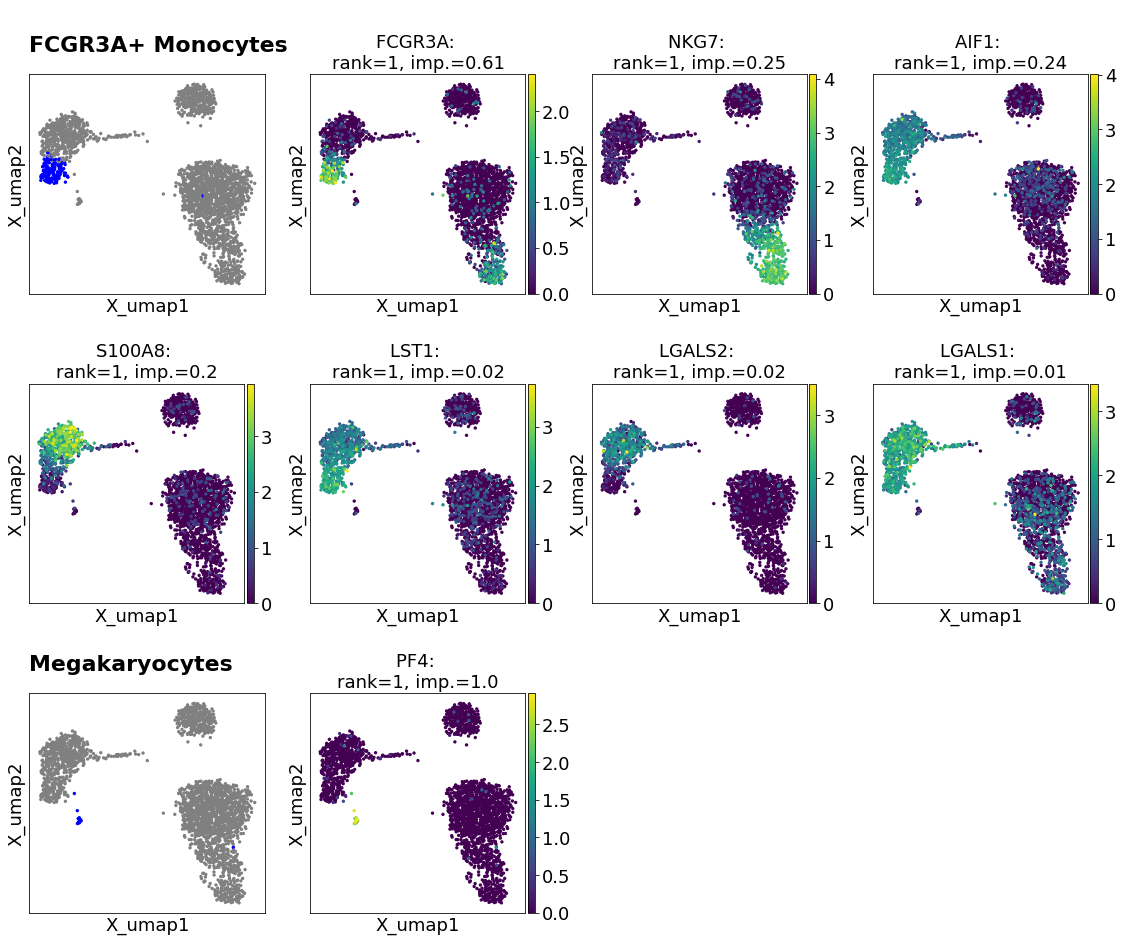

In [42]:
selector.plot_clf_genes(n_cols=4,celltypes=["FCGR3A+ Monocytes","Megakaryocytes"],save="./Selector_plot_clf_genes.png")

### pl.masked_dotplot

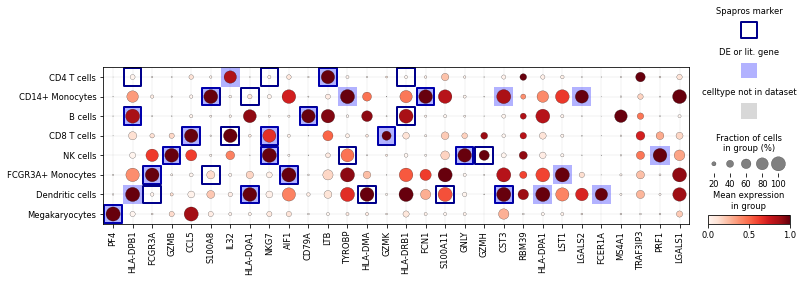

In [45]:
adata = sp.ut.get_processed_pbmc_data()
selector = sp.se.ProbesetSelector(adata, "celltype", n=30, verbosity=0)
selector.select_probeset()
sp.pl.masked_dotplot(adata,selector,save="./masked_dotplot.png")

### evaluator.plot_marker_corr

In [46]:
marker_list ={
    'B cells': ['EAF2', 'MS4A1', 'HVCN1', 'TCL1A', 'LINC00926', 'CD79A', 'IGLL5'],
    'NK cells': ['XCL2', 'CLIC3', 'AKR1C3'],
    'CD8 T cells': ['GZMK'],
    'Dendritic cells': ['FCER1A', 'CLEC10A'],
    'Megakaryocytes': ['RGS18','C2orf88','SDPR','TMEM40','GP9','MFSD1','PF4','PPBP'],
}
adata = sp.ut.get_processed_pbmc_data()
selections = sp.se.select_reference_probesets(
    adata, methods=["PCA", "DE", "HVG", "random"], n=30, seeds=range(7), verbosity=0)
evaluator = sp.ev.ProbesetEvaluator(
    adata, verbosity=0, results_dir=None, scheme="custom", metrics=["marker_corr"], marker_list=marker_list)
for set_id, df in selections.items():
    gene_set = df[df["selection"]].index.to_list()
    evaluator.evaluate_probeset(gene_set, set_id=set_id)


/Users/louis.kuemmerle/Promotion/projects/G1_genes_and_autoencoders/code/spapros/spapros/evaluation/metrics.py:1320: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summaries = cor_df[[col for col in cor_df.columns if (col != "mean")]].mean(axis=0)


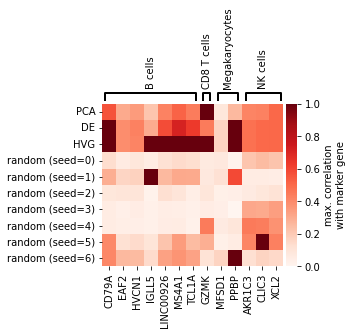

In [49]:
evaluator.plot_marker_corr(save="./Evaluator_plot_marker_corr.png")
